<a href="https://colab.research.google.com/github/vinismachadoo/alura_imersao_dados_2/blob/main/microdados_enem_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. INTRODUÇÃO
## SUBTITULO
### H3
#### H4
**BOLD**
_ITALIC_
---

`CODE`
---
$latex$

#1. INTRODUÇÃO
Em 1998 era criado o Exame Nacional do Ensino Médio (Enem) com a finalidade de avaliar o desempenho dos estudantes de escolas públicas e particulares do Ensino Médio. Desde 2009, no entanto, o Enem assumiu mais uma função: ser a porta de entrada dos estudantes nas instituições federais de ensino superior, assim como para programas do Governo Federal como o Sisu, Prouni e Fies.

Milhões de estudantes em todo o país realizam o exame aplicado entre outubro e novembro em dois domingos consecutivos. No primeiro dia, são realizadas as provas de linguagens e ciências humanas além de uma redação, enquanto no segundo, o candidato testa seus conhecimentos em matemática e ciências da natureza. A prova, bastante temida entre os alunos, ocorre anualmente e requer quase um ano de preparação pra reunir todo o conteúdo do ensino médio.

Os microdados mais recentes do exame, isto é, a base de dados com todas as informações respondidas pelo candidato desde o momento da inscrição até o resultado,  que estão disponíveis ao público no site do INEP são da edição realizada em 2019, que contou com mais de 5 milhões de inscrições de todo o país.

#2. BIBLIOTECAS E CONFIGURAÇÕES

In [1]:
!pip install geopandas --quiet
!pip install squarify --quiet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib.patches import Patch
from matplotlib.offsetbox import AnchoredText
import squarify
import geopandas as gpd

import sys
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows=200
pd.options.display.max_columns=200

In [137]:
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

In [140]:
sns.color_palette("Accent")

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4)]

#3. BASE DE DADOS

O dataset que será explorado neste notebook pode ser encontrado [aqui](https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv). Para esta análise, o time da Alura selecionou uma amostra aleatória de 127,380 inscritos de forma a representar a população. É possível entender melhor a amostragem neste [link](https://github.com/alura-cursos/imersao-dados-2-2020/tree/master/filtrarDados). Foram mantidas todas as 136 colunas do dataset original e a descrição de cada coluna, assim como suas categorias possíveis de resposta, neste [diconário](https://github.com/alura-cursos/imersao-dados-2-2020/tree/master/DICION%C3%81RIO).

In [3]:
enem = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

In [4]:
enem.shape

(127380, 136)

In [5]:
enem.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.273800e+05,127380.0,1.273800e+05,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,1.237570e+05,123757.000000,127380.000000,127380.000000,127380.000000,71978.000000,127380.000000,2.862700e+04,2.862700e+04,28627.000000,28627.000000,28627.000000,28627.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,127380.000000,127380.0,127380.0,127380.000000,127380.000000,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,1.273800e+05,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,92758.000000,98043.000000,98043.000000,92758.000000,92758.000000,98043.000000,98043.000000,92758.000000,127380.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,127380.000000
mean,1.900035e+11,2019.0,3.086067e+06,30.709389,22.094355,1.076841,2.131198,1.029345,3.058310e+06,30.431103,1.540493,2.961870,1.330515,1.004585,0.120906,3.125412e+07,3.127669e+06,31.120690,2.257764,1.035037,1.005973,0.001099,0.000110,0.000259,0.000377,0.000008,0.001499,0.000479,0.001704,0.000353,0.000055,0.000228,0.000228,0.000659,0.000251,0.000746,0.000047,0.000008,0.001342,0.000039,0.000181,0.000801,0.001248,0.001515,0.001185,0.000188,0.002544,0.000110,0.000322,0.000275,0.000455,0.000008,0.0,0.000008,0.000008,0.000016,0.0,0.000008,0.000008,0.0,0.000118,0.000016,0.000008,0.0,0.0,0.000079,0.000031,0.000063,0.000008,0.0,0.000047,0.000079,3.088090e+06,30.730735,0.729016,0.771667,0.771667,0.729016,504.508538,508.511745,512.506910,516.509864,477.964015,507.365912,520.463928,523.555206,0.524486,1.136155,120.554859,122.912396,114.901013,121.682323,91.519435,571.570025,3.864068
std,1.469535e+06,0.0,9.961399e+05,9.931060,7.498707,0.440671,1.017373,0.202790,9.827584e+05,9.793934,0.716452,4.106733,0.555043,0.067556,0.326019,9.564098e+06,9.600084e+05,9.569764,0.755357,0.183876,0.122273,0.033134,0.010483,0.016094,0.019408,0.002802,0.038694,0.021878,0.041239,0.018792,0.007413,0.015087,0.015087,0.025671,0.015848,0.027299,0.006863,0.002802,0.036615,0

In [6]:
enem.columns[enem.isnull().any()]

Index(['CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO',
       'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ENSINO', 'CO_ESCOLA',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

#4. ESTATÍSTICAS SOCIODEMOGRÁFICAS 

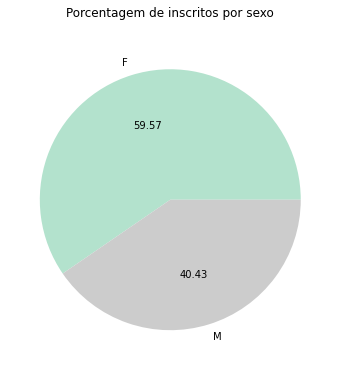

In [100]:
fig, ax = plt.subplots(figsize=(10,6))
enem['TP_SEXO'].value_counts().plot(kind='pie', ax=ax, cmap='Pastel2', autopct='%.2f')
plt.title('Porcentagem de inscritos por sexo', pad=20, fontsize=12, color='black')
sns.despine()
plt.ylabel('')
plt.show()

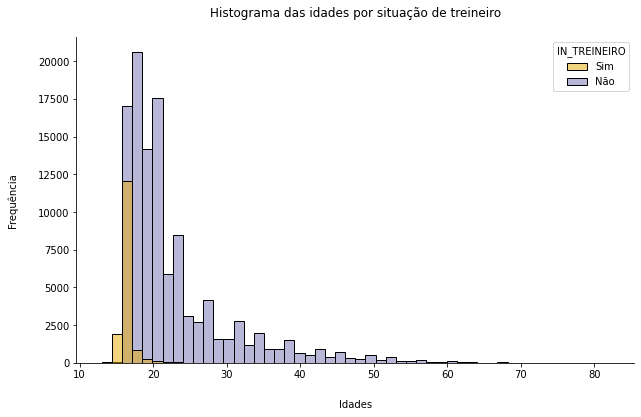

In [88]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=enem, x='NU_IDADE', hue='IN_TREINEIRO', bins=50, ax=ax, palette='Dark2_r')
plt.title('Histograma das idades por situação de treineiro', pad=20, fontsize=12, color='black')
sns.despine()
plt.xlabel('Idades', labelpad=20)
plt.ylabel('Frequência', labelpad=20)
plt.show()

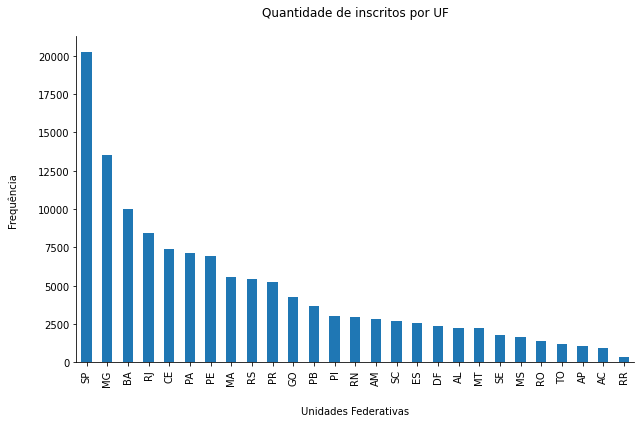

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
enem['SG_UF_RESIDENCIA'].value_counts().plot(kind='bar')
plt.title('Quantidade de inscritos por UF', pad=20, fontsize=12, color='black')
plt.xlabel('Unidades Federativas', labelpad=20)
plt.ylabel('Frequência', labelpad=20)
sns.despine()
plt.show()

In [7]:
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/vinismachadoo/alura_imersao_dados_2/main/uf_brasil.geojson')

In [8]:
mapa_brasil['codigo_ibg'] = mapa_brasil['codigo_ibg'].astype('int')

In [10]:
inscritos_por_estado = pd.concat([mapa_brasil.set_index('codigo_ibg'), enem['CO_UF_RESIDENCIA'].value_counts()], axis=1)

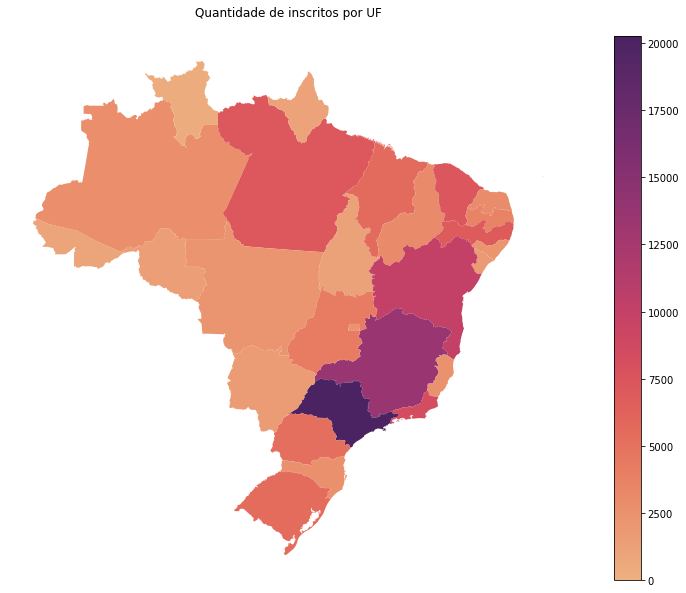

In [134]:
fig,ax = plt.subplots(figsize=(16,10))
inscritos_por_estado.plot(ax=ax, column='CO_UF_RESIDENCIA', cmap='flare', legend=True, vmin=0)
sns.despine(bottom=True, left=True)
plt.title('Quantidade de inscritos por UF', pad=20, fontsize=12, color='black')
ax.set_yticks([])
ax.set_xticks([])
plt.show()

In [12]:
relacao_renda_raca = enem.groupby('Q006')['TP_COR_RACA'].value_counts(normalize=True).unstack()
relacao_renda_raca.rename(columns={0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena'}, inplace=True)

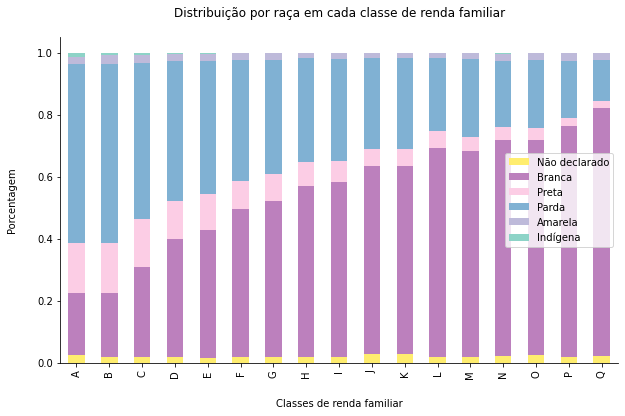

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
relacao_renda_raca.plot(kind='bar', stacked=True, colormap='Set3_r', ax=ax)
plt.title('Distribuição por raça em cada classe de renda familiar', pad=20, fontsize=12, color='black')
plt.xlabel('Classes de renda familiar', labelpad=20)
plt.ylabel('Porcentagem', labelpad=20)
sns.despine()
plt.legend()
plt.show()

#5. LISTAS E VARIÁVEIS AUXILIARES 

É bastante comum que ao longo da análise sejam necessárias listagens ordenadas para organizar os gráficos e aprimorar a visualização dos dados, além de variáveis (colunas) que são criadas a partir de outras variáveis e não existem na base de dados originais. Esta seção foi dedicada exclusivamente para esta finalidade, de forma a concentrar estas informações facilitando o desenvolvimento da análise e o entendimento do leitor.

In [16]:
# Classes de renda, de A até Q, em ordem crescente
classes_renda = enem['Q006'].unique()
classes_renda.sort()

In [17]:
# Colunas da base de dados que tem as notas das 5 provas realizadas
provas = ['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']

In [ ]:
atendimentos_especiais = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ','IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA','IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA','IN_AUTISMO', 'IN_VISAO_MONOCULAR']

In [18]:
# Criação de nova coluna indicando se o candidato reside em um municipio e fez a prova em outro
enem.loc[enem['CO_MUNICIPIO_RESIDENCIA'] != enem['CO_MUNICIPIO_PROVA'], 'MUN_RES_E_MUN_PROVA'] = 'Diferente'
enem['MUN_RES_E_MUN_PROVA'].fillna('Igual', inplace=True)

In [19]:
# Criação de nova coluna indicando se o candidato tem carro e/ou moto
enem.loc[enem['Q010'] == 'A', 'TEM_CARRO_OU_MOTO'] = 'Não'
enem.loc[enem['Q011'] == 'A', 'TEM_CARRO_OU_MOTO'] = 'Não'
enem['TEM_CARRO_OU_MOTO'].fillna('Sim', inplace=True)

In [20]:
# Ajustando os 8 status possíveis da redação para zerada ou sem problemas
enem.loc[enem['TP_STATUS_REDACAO'] != 1, 'TP_STATUS_REDACAO'] = 'Zerada'
enem['TP_STATUS_REDACAO'].replace(1,'Sem problemas', inplace=True)

In [21]:
# Ajeitando a coluna de treineiro com Não=0 e Sim=1
enem.loc[enem['IN_TREINEIRO'] == 1, 'IN_TREINEIRO'] = 'Sim'
enem['IN_TREINEIRO'].replace(0,'Não', inplace=True)

In [22]:
# Criação de nova coluna indicando o somatório de pontos do candidato
enem["NU_NOTA_SOMA"] = enem[provas].sum(axis=1)

#6. INSCRITOS FALTOSOS

Como explicado na introdução, o exame é realizado em 2 domingos consecutivos e, portanto, o estudante tem 2 chances de encontrar o portão fechado. A primeira análise realizada partiu da hipótese que se o candidato perde a prova no primeiro dia ele não comparece ao segundo dia. 

Esta hipótese foi confirmada constatando que 99.27% dos candidatos ausentes no primeiro dia não apareceram no domingo seguinte. Esta constatação é condizente com o esperado haja vista que o candidato que zera alguma prova não está apto a se cadastrar no sisu para tentar vaga em alguma universidade pública ou algum programa do governo federal.

Dito isso, considerou-se como candidato faltoso, aquele que não compareceu há pelo menos um domingo. Complementariamente, considerou-se como candidato presente aquele que compareceu aos dois dias do exame.

In [23]:
enem.groupby('TP_PRESENCA_CH')['TP_PRESENCA_MT'].value_counts(normalize=True).unstack().rename(columns={0:'Falta',1:'Presente',2:'Eliminado'},
                                                                                               index={0:'Falta',1:'Presente',2:'Eliminado'})

TP_PRESENCA_MT,Falta,Presente,Eliminado
TP_PRESENCA_CH,,,
Falta,0.992708,0.007292,NaN
Presente,0.055608,0.943861,0.00053
Eliminado,0.952381,0.047619,NaN


A segunda hipótese levantada foi se existia alguma relação do não comparecimento do inscrito com o local de aplicação da prova. Acontece que o estudante pode ser alocado para um município (ou até mesmo estado) diferente do qual reside por falta de escolas com estrutura de aplicação. Outro fator que piora o cenário é a posse de carro ou moto na residência visto depender do transporte público no Brasil em circunstâncias normais já é desgastante para o candidato, tendo que ir para outra cidade pode sim ser um fator para desistência de prestar o exame.

In [24]:
# Inscritos que não estavam presentes na prova de ciencias humanas (dia 1) ou na prova de matemática (dia 2)
enem_faltosos = enem[(enem['TP_PRESENCA_CH'] == 0) | (enem['TP_PRESENCA_MT'] == 0)]

In [80]:
# Quantidade por local de prova diferente de onde reside e posse de carro ou moto
tmp = enem_faltosos.groupby('MUN_RES_E_MUN_PROVA')['TEM_CARRO_OU_MOTO'].value_counts()
relacao_municipio_prova_veiculo = [f'{round(tmp[i]*100/tmp.sum(),2)}%' for i in tmp.index]

In [97]:
relacao_municipio_prova_veiculo

['15.8%', '1.83%', '75.55%', '6.82%']

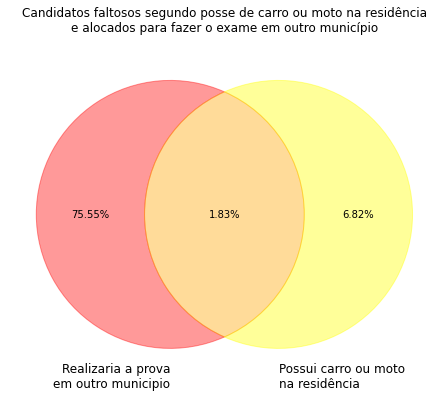

In [98]:
# Diagrama de Venn para visualizar a relacao acima 
fig, ax = plt.subplots(figsize=(10,6))

v = venn2(subsets = (2,2,2), set_labels = ('Realizaria a prova\nem outro municipio', 'Possui carro ou moto\nna residência'), ax=ax)
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('01').set_color('yellow')
v.get_patch_by_id('11').set_color('orange')
v.get_label_by_id('10').set_text(relacao_municipio_prova_veiculo[2])
v.get_label_by_id('01').set_text(relacao_municipio_prova_veiculo[3])
v.get_label_by_id('11').set_text(relacao_municipio_prova_veiculo[1])

plt.title('Candidatos faltosos segundo posse de carro ou moto na residência\ne alocados para fazer o exame em outro município', 
          pad=20, fontsize=12, color='black')
plt.show()

O que foi observado é que mais 75% dos candidatos que faltaram pelo menos um dos dias realizaria a prova em outro município e não tinham carro ou moto para se transportar. Apenas 7% dos inscritos faltaram o exame tendo carro ou moto na residência e realizariam o exame no mesmo município de residência.

Vale ressaltar que não é possível saber o motivo concreto da ausência do inscrito, pretende-se apenas mostrar que este fatores combinados podem ter sido decisivos na presença (ou não) ao local da prova.

#7. ANALISANDO OS CANDIDATOS DO ENEM

In [105]:
enem_presentes = enem[(enem['TP_PRESENCA_CH'] == 1) & (enem['TP_PRESENCA_MT'] == 1)]

In [28]:
enem_presentes['TP_STATUS_REDACAO'].value_counts()

Sem problemas    89977
Zerada            2562
Name: TP_STATUS_REDACAO, dtype: int64

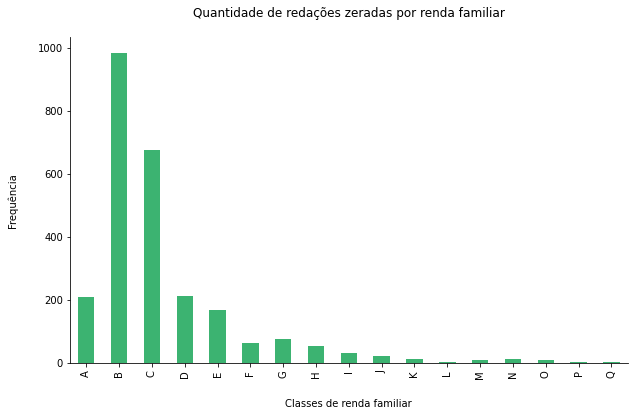

In [127]:
fig, ax = plt.subplots(figsize=(10,6))
enem_presentes[enem_presentes['TP_STATUS_REDACAO'] == 'Zerada']['Q006'].value_counts().sort_index().plot(kind='bar', color='mediumseagreen')
plt.title('Quantidade de redações zeradas por renda familiar', pad=20, fontsize=12, color='black')
plt.xlabel('Classes de renda familiar', labelpad=20)
plt.ylabel('Frequência', labelpad=20)
sns.despine()
plt.show()

In [103]:
enem_presentes[enem_presentes['NU_NOTA_REDACAO'] == 1000]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,MUN_RES_E_MUN_PROVA,TEM_CARRO_OU_MOTO,NU_NOTA_SOMA
22973,190001922151,2019,2304400,Fortaleza,23,CE,17,F,1,3,1,2304400.0,Fortaleza,23.0,CE,2,0,3,1.0,Não,23564121.0,2304400.0,Fortaleza,23.0,CE,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,1,1,1,1,506.0,507.0,511.0,517.0,623.6,665.7,616.7,793.1,DEADBDAEEBCDCEACBCBBECCDBEBACEDEADABBCBECECCB,EEBCCBDBBAACBCEEEBCDCACDEDBCCDBBEEDEADBEEACDB,BDACE99999BCBAADDDBDDAAECDBECEECBCCDEEDBADEBBC...,AACDCBEEEBEDDDEBADAACDBBCECEBCBADBECBDECEDDDA,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,Sem problemas,200.0,200.0,200.0,200.0,200.0,1000.0,G,G,E,D,4,P,D,E,E,C,A,B,B,B,B,B,A,A,E,B,B,E,B,D,B,Igual,Não,3699.1
61045,190003443879,2019,2702900,Girau do Ponciano,27,AL,20,F,1,3,1,2700300.0,Arapiraca,27.0,AL,1,3,1,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2702900,Girau do Ponciano,27,AL,1,1,1,1,503.0,509.0,514.0,515.0,660.3,667.9,617.4,733.5,CEECCDDEADCCCDDBBCECADAEAAACACBDEBCCEDCEDDADE,ACACEEBCCBABADBEEACDBBAEBCCABCDBADCADDDBBDECE,99999AACEABACCCDBDEBDACDDDECCECDDBAEBCDAAECBCC...,EAEADDEBBBCCCDBABEDEACCBBDCEAEDBECBEDECEDAEAA,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,Sem problemas,200.0,200.0,200.0,200.0,200.0,1000.0,E,G,F,D,5,I,A,B,D,B,A,B,A,A,A,A,A,A,B,A,A,D,A,B,B,Igual,Não,3679.1


In [113]:
notas = enem_presentes[provas]

In [114]:
notas.describe()

,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
count,92539.000000,92539.000000,92539.000000,92539.000000,92539.000000
mean,478.026814,523.681280,510.063370,522.298789,580.080399
std,76.247734,109.346899,81.441879,63.132783,181.749009
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,435.400000,450.800000,485.500000,500.000000
50%,470.300000,501.800000,513.600000,527.600000,580.000000
75%,533.300000,598.400000,569.100000,566.500000,680.000000
max,797.300000,985.000000,809.400000,801.700000,1000.000000


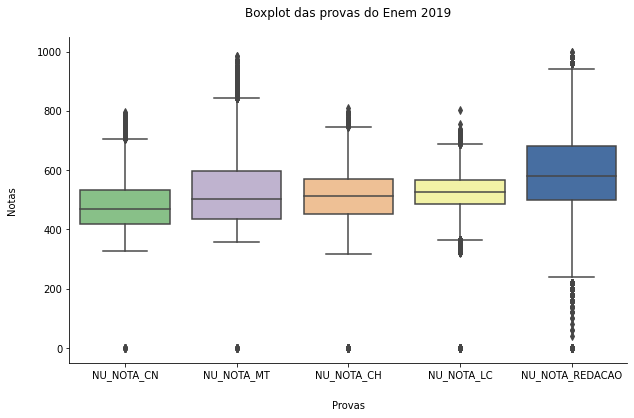

In [128]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=notas, palette="Accent")
plt.title('Boxplot das provas do Enem 2019', pad=20, fontsize=12, color='black')
plt.xlabel('Provas', labelpad=20)
plt.ylabel('Notas', labelpad=20)
sns.despine()
plt.show()

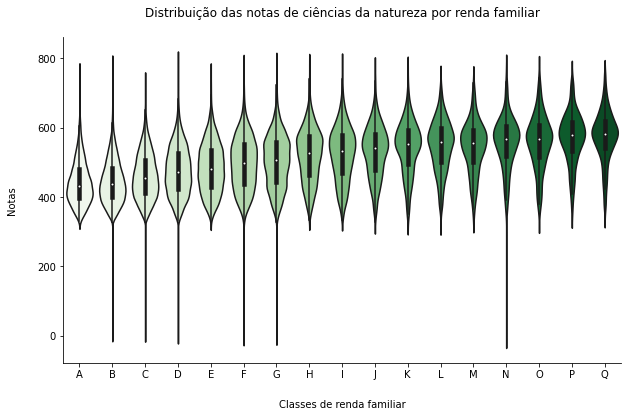

In [151]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=enem_presentes, x='Q006', y='NU_NOTA_CN', order=classes_renda, scale='width', palette='Greens', ax=ax)
plt.title('Distribuição das notas de ciências da natureza por renda familiar', pad=20, fontsize=12, color='black')
plt.xlabel('Classes de renda familiar', labelpad=20)
plt.ylabel('Notas', labelpad=20)
sns.despine()
plt.show()

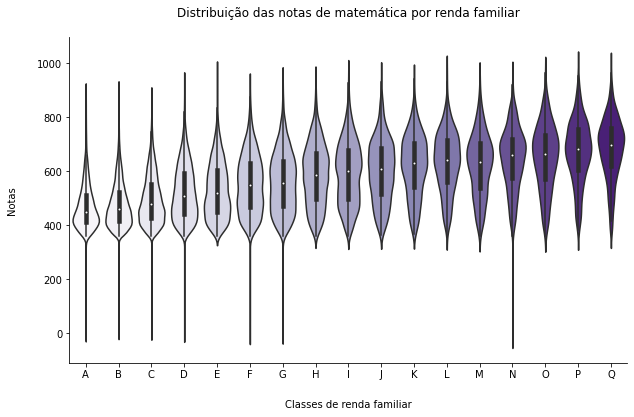

In [141]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=enem_presentes, x='Q006', y='NU_NOTA_MT', order=classes_renda, scale='width', palette="Purples", ax=ax)
plt.title('Distribuição das notas de matemática por renda familiar', pad=20, fontsize=12, color='black')
plt.xlabel('Classes de renda familiar', labelpad=20)
plt.ylabel('Notas', labelpad=20)
sns.despine()
plt.show()

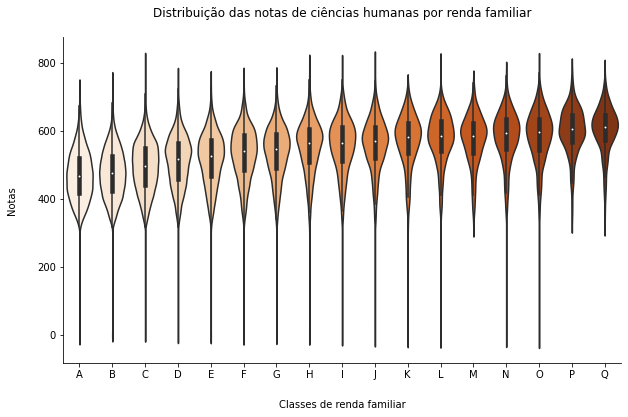

In [152]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=enem_presentes, x='Q006', y='NU_NOTA_CH', order=classes_renda, scale='width', palette="Oranges", ax=ax)
plt.title('Distribuição das notas de ciências humanas por renda familiar', pad=20, fontsize=12, color='black')
plt.xlabel('Classes de renda familiar', labelpad=20)
plt.ylabel('Notas', labelpad=20)
sns.despine()
plt.show()

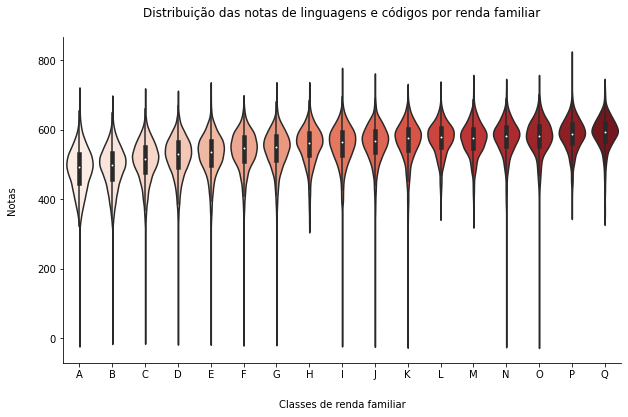

In [154]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=enem_presentes, x='Q006', y='NU_NOTA_LC', order=classes_renda, scale='width', palette="Reds", ax=ax)
plt.title('Distribuição das notas de linguagens e códigos por renda familiar', pad=20, fontsize=12, color='black')
plt.xlabel('Classes de renda familiar', labelpad=20)
plt.ylabel('Notas', labelpad=20)
sns.despine()
plt.show()

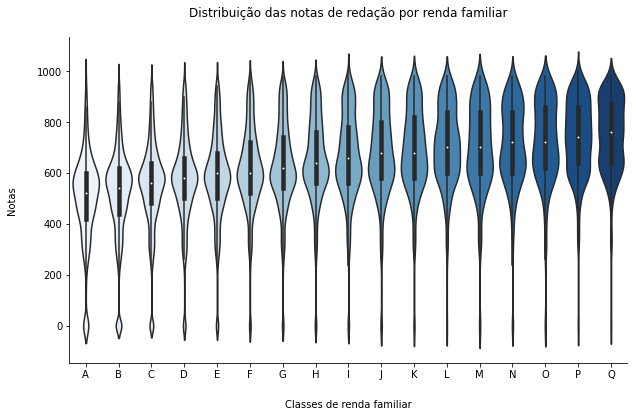

In [155]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=enem_presentes, x='Q006', y='NU_NOTA_REDACAO', order=classes_renda, scale='width', palette="Blues", ax=ax)
plt.title('Distribuição das notas de redação por renda familiar', pad=20, fontsize=12, color='black')
plt.xlabel('Classes de renda familiar', labelpad=20)
plt.ylabel('Notas', labelpad=20)
sns.despine()
plt.show()

## 7.1 CANDIDATOS COM CONDIÇÃO ESPECIAL

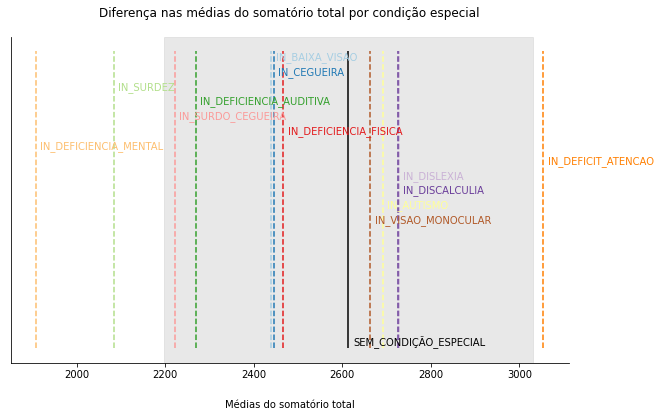

In [223]:
fig, ax = plt.subplots(figsize=(10,6))

pessoas_sem_deficiencia = enem_presentes
for i, at in enumerate(atendimentos_especiais):
  media = enem_presentes[enem_presentes[at]==1]['NU_NOTA_SOMA'].mean()
  ax.vlines(x=media, ymin=0, ymax=100, color=sns.color_palette('Paired')[i], linestyle='--')
  ax.text(media+10,100-5*i,at, color=sns.color_palette('Paired')[i], va='top', ha='left')
  pessoas_sem_deficiencia = pessoas_sem_deficiencia[~pessoas_sem_deficiencia[at].isin([1])]

ax.vlines(x=pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean(), ymin=0, ymax=100, color='black')
ax.text(pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean()+10,0,'SEM_CONDIÇÃO_ESPECIAL', color='black', va='bottom', ha='left')
ax.axvspan(pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean()-pessoas_sem_deficiencia['NU_NOTA_SOMA'].std(),
           pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean()+pessoas_sem_deficiencia['NU_NOTA_SOMA'].std(),
           alpha=0.5, color='lightgray')

plt.title('Diferença nas médias do somatório total por condição especial', pad=20, fontsize=12, color='black')
plt.xlabel('Médias do somatório total', labelpad=20)
plt.yticks([])
sns.despine()
plt.show()